In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

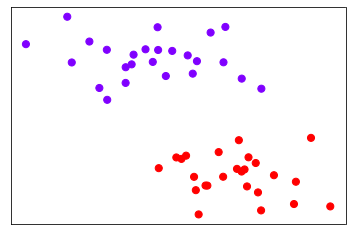

In [2]:
# 生成两簇样本
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)
# 画出样本散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")#rainbow彩虹色
# 取消XY轴的刻度
plt.xticks([])
plt.yticks([])
plt.show()

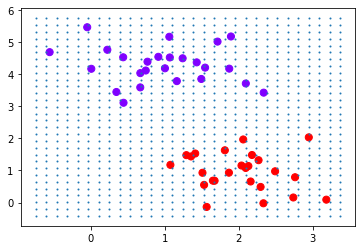

In [3]:
# 画出样本散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")#rainbow彩虹色
#获取当前的子图，如果不存在，则创建新的子图
ax = plt.gca() 
#获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
 
axisy,axisx = np.meshgrid(axisy,axisx)
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标
 
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点
 
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

(-0.41872382476349596, 5.754870487889891)

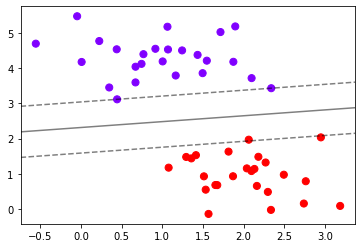

In [4]:
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)#计算出对应的决策边界
Z = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5#透明度
           ,linestyles=["--","-","--"])
 
ax.set_xlim(xlim)#设置x轴取值
ax.set_ylim(ylim)

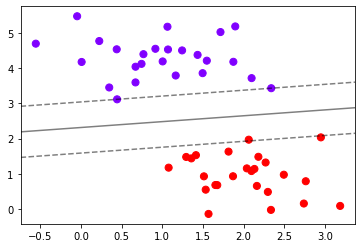

In [5]:
#将上述过程包装成函数：
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"]) 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
 
#则整个绘图过程可以写作：
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)


In [6]:
print(clf.predict(X))
#根据决策边界，对X中的样本进行分类，返回的结构为n_samples
 
print(clf.score(X,y))
#返回给定测试数据和标签的平均准确度
 
print(clf.support_vectors_)
#返回支持向量坐标
 
print(clf.n_support_)#array([2, 1])
#返回每个类中支持向量的个数

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]
1.0
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
[2 1]


(100, 2)
(100,)


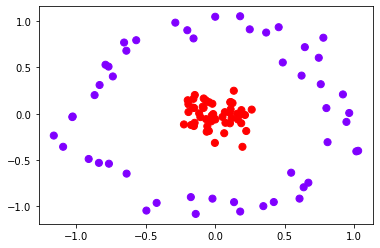

In [7]:
from sklearn.datasets import make_circles
# 构造一个环形数据数据集（不是线性可分）
X,y = make_circles(100, factor=0.1, noise=.1)
 
print(X.shape)
print(y.shape)
 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()

0.66

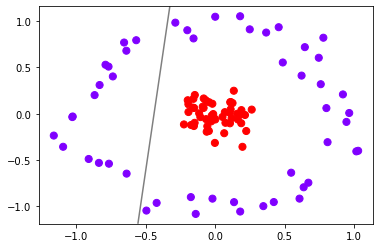

In [8]:
# 如果用线性分类器，则不能很好区分数据集
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)
clf.score(X,y)

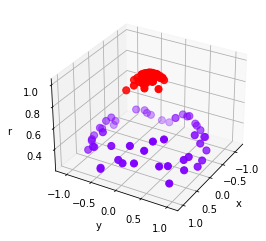

In [9]:
#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))
 
rlim = np.linspace(min(r),max(r),100)
 
from mpl_toolkits import mplot3d
 
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
    
plot_3D()

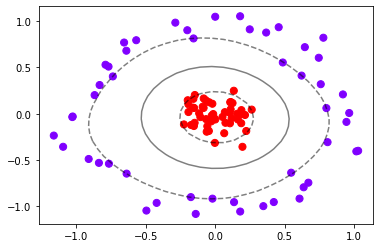

In [10]:
# 用径向基函数作为核函数区分环形数据
clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm #from sklearn.svm import SVC  两者都可以
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification

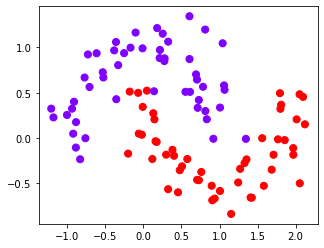

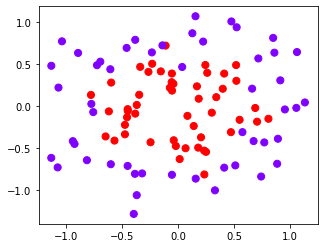

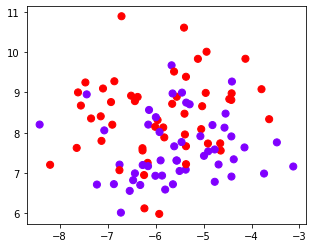

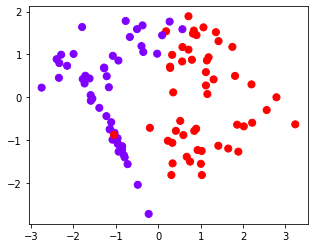

In [12]:
n_samples = 100
# 构造月亮型数据集，环形数据集，聚类数据集，线性可分数据集
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),#分簇的数据集
    make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0, random_state=5)
                #n_features：特征数，n_informative：带信息的特征数，n_redundant：不带信息的特征数
    ]
 
Kernel = ["linear","poly","rbf","sigmoid"]
 
#四个数据集分别是什么样子呢？
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

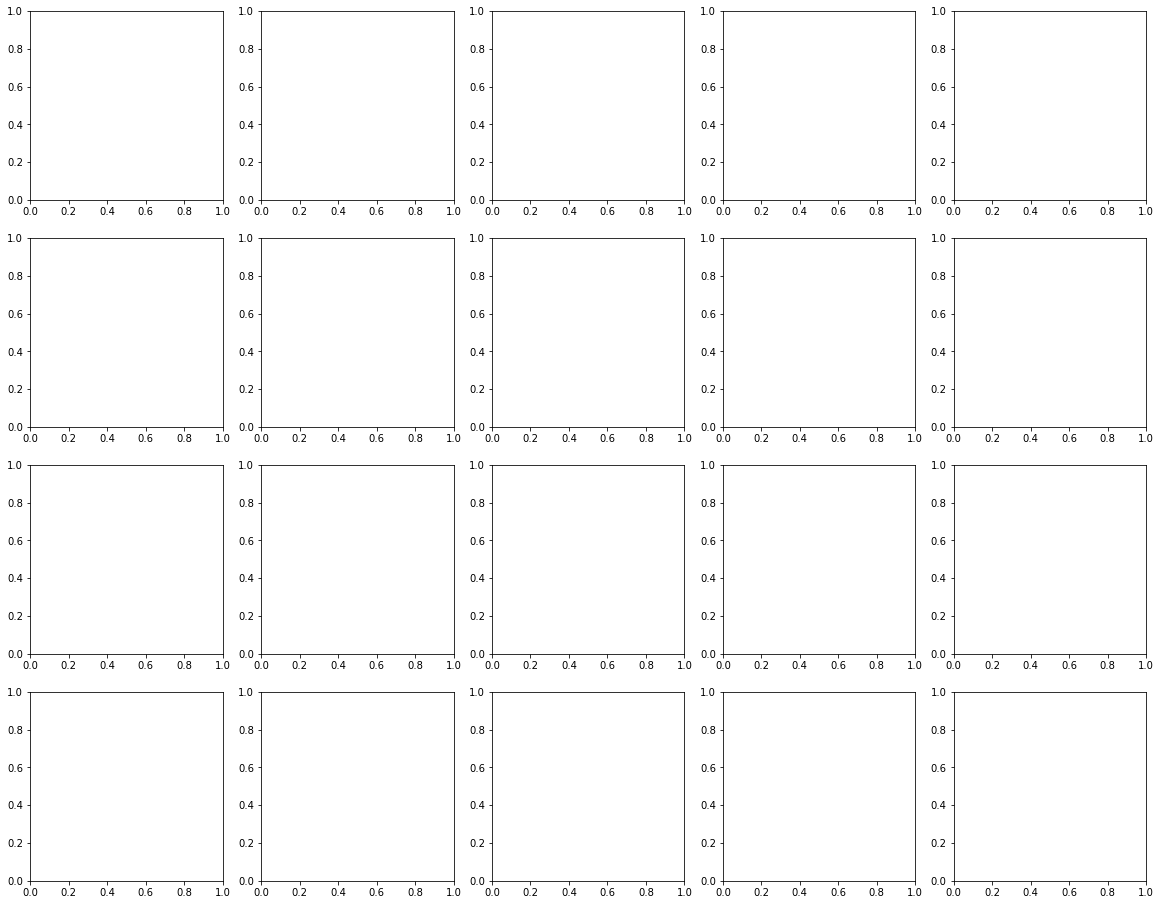

In [13]:
nrows=len(datasets)
ncols=len(Kernel) + 1
 
fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

<ipython-input-14-ce6f3d7e8794>:50: UserWarning: No contour levels were found within the data range.
  ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],


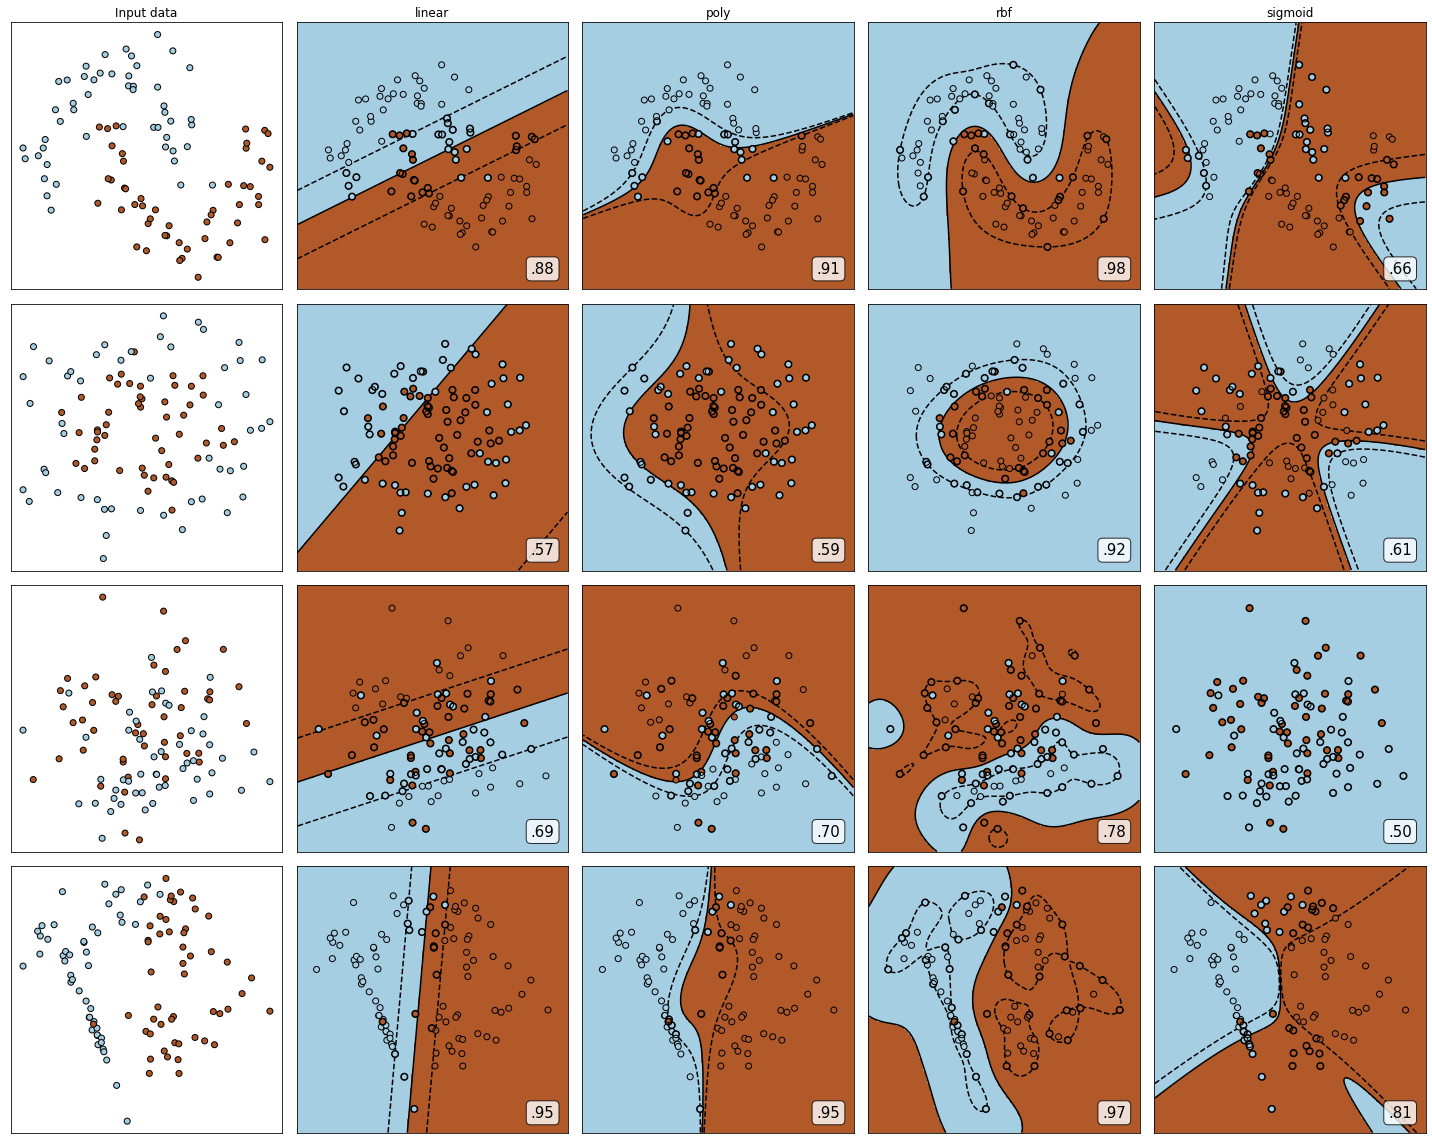

In [14]:
nrows=len(datasets)
ncols=len(Kernel) + 1
 
fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

#第一层循环：在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):
    
    #在图像中的第一列，放置原数据的分布
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    
    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        
        #定义子图位置
        ax = axes[ds_cnt, est_idx + 1]
        
        #建模
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        
        #绘制图像本身分布的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y
                   ,zorder=10
                   ,cmap=plt.cm.Paired,edgecolors='k')
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                    facecolors='none', zorder=10, edgecolors='k')# facecolors='none':透明的
        
        #绘制决策边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1, 0, 1])
        
        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())
        
        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        #为每张图添加分类的分数   
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
                    #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )
 
plt.tight_layout()
plt.show()

(569, 30)
[0 1]


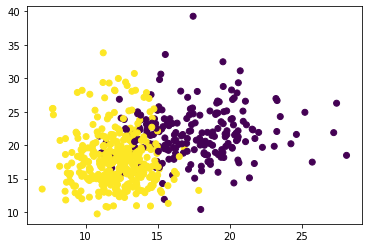

'\nKernel = ["linear","poly","rbf","sigmoid"]\n# ！！！注意运行时间很久，因为用多项式核函数\nfor kernel in Kernel:\n    time0 = time()\n    clf= SVC(kernel = kernel\n             , gamma="auto"\n            # , degree = 1 # 多项式的次数\n             , cache_size=10000#使用计算的内存，单位是MB，默认是200MB\n            ).fit(Xtrain,Ytrain)\n    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))\n    print(time()-time0)\n'

In [15]:
# 乳腺癌数据集案例示范
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime
 
data = load_breast_cancer()
X = data.data
y = data.target
 
print(X.shape)
print(np.unique(y)) # 作为同一类数据的颜色
 
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
 


"""
Kernel = ["linear","poly","rbf","sigmoid"]
# ！！！注意运行时间很久，因为用多项式核函数
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
            # , degree = 1 # 多项式的次数
             , cache_size=10000#使用计算的内存，单位是MB，默认是200MB
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(time()-time0)
"""

In [16]:
Kernel = ["linear","poly","rbf","sigmoid"]
 
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 2 # 定义多项式次数为2
             , cache_size=5000
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(time()-time0)

The accuracy under kernel linear is 0.929825
0.4245748519897461
The accuracy under kernel poly is 0.947368
14.048979759216309
The accuracy under kernel rbf is 0.596491
0.03986549377441406
The accuracy under kernel sigmoid is 0.596491
0.004986286163330078


In [17]:
import pandas as pd
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T#描述性统计
#从mean列和std列可以看出严重的量纲不统一
#从1%的数据和最小值相对比，90%的数据和最大值相对比，查看是否是正态分布或偏态分布，如果差的太多就是偏态分布，谁大方向就偏向谁
#可以发现数据大的特征存在偏态问题
#这个时候就需要对数据进行标准化

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


In [18]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)#将数据转化为0,1正态分布
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T#均值很接近，方差为1了

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.162867e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.530609e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-7.078891e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.799835e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.132177e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.120369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-4.421380e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,9.732500e-16,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.971670e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.453631e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
 
Kernel = ["linear","poly","rbf","sigmoid"]
 
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 2
             , cache_size=5000
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(time()-time0)

The accuracy under kernel linear is 0.976608
0.00897073745727539
The accuracy under kernel poly is 0.783626
0.010970354080200195
The accuracy under kernel rbf is 0.970760
0.006968259811401367
The accuracy under kernel sigmoid is 0.953216
0.0049932003021240234


0.9766081871345029 0.012067926406393264


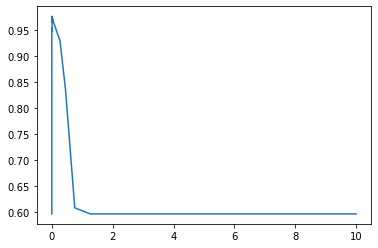

In [20]:
score = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit#用于支持带交叉验证的网格搜索
from sklearn.model_selection import GridSearchCV#带交叉验证的网格搜索
 
time0 = time()
 
gamma_range = np.logspace(-10,1,20)
coef0_range = np.linspace(0,5,10)
 
param_grid = dict(gamma = gamma_range
                  ,coef0 = coef0_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)#将数据分为5份，5份数据中测试集占30%
grid = GridSearchCV(SVC(kernel = "poly",degree=1,cache_size=5000)
                        ,param_grid=param_grid
                        ,cv=cv)
grid.fit(X, y)
 
print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, grid.best_score_))
print(time()-time0)


The best parameters are {'coef0': 0.0, 'gamma': 0.18329807108324375} with a score of 0.96959
5.9171929359436035


0.9766081871345029 1.2340816326530613


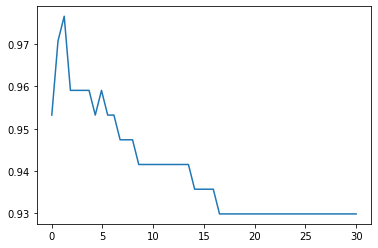

0.9824561403508771 6.130408163265306


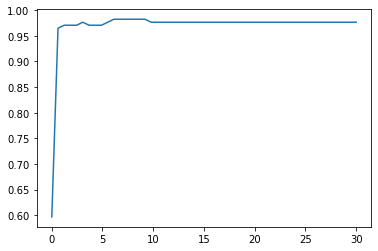

0.9824561403508771 5.938775510204081


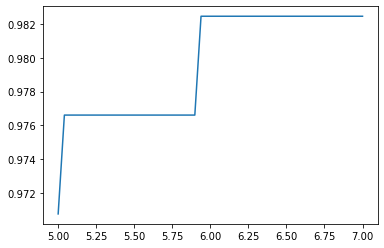

In [23]:
#调线性核函数
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()
 
#换rbf
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()
 
#进一步细化
score = []
C_range = np.linspace(5,7,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 
0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()